# Data Scientist Job Market Analysis

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [122]:
df=pd.read_csv(r'E:\Data605\Project\data_cleaned_2021.csv')
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na


## Get to know about the data

In [124]:
# Rating,Size,Revenue,Average Salary(K), Company Age
df['Size'].unique()

array(['501 - 1000 ', '10000+ ', '1001 - 5000 ', '51 - 200 ',
       '201 - 500 ', '5001 - 10000 ', '1 - 50 ', 'unknown'], dtype=object)

In [125]:
df['Revenue'].unique()

array(['$50 to $100 million (USD)', '$2 to $5 billion (USD)',
       '$100 to $500 million (USD)', '$500 million to $1 billion (USD)',
       'Unknown / Non-Applicable', '$1 to $2 billion (USD)',
       '$25 to $50 million (USD)', '$10+ billion (USD)',
       '$1 to $5 million (USD)', '$10 to $25 million (USD)',
       '$5 to $10 billion (USD)', 'Less than $1 million (USD)',
       '$5 to $10 million (USD)'], dtype=object)

In [126]:
len(df)

742

In [127]:
len(df['Company Name'].unique())

343

In [128]:
df['Company Name'].value_counts()

MassMutual\n3.6                        14
Reynolds American\n3.1                 14
Takeda Pharmaceuticals\n3.7            14
Software Engineering Institute\n2.6    11
Liberty Mutual Insurance\n3.3          10
                                       ..
Biz2Credit Inc\n4.0                     1
American Axle & Manufacturing\n3.3      1
Gallup\n4.2                             1
Porch\n3.2                              1
Credera\n4.3                            1
Name: Company Name, Length: 343, dtype: int64

In [129]:
df.rename(columns={'Avg Salary(K)':'Avg_Salary_K'},inplace=True)

In [130]:
df.groupby(df['Company Name']).Avg_Salary_K.mean()

Company Name
1-800-FLOWERS.COM, Inc.\n2.8      76.50
1904labs\n4.7                    143.50
23andMe\n4.0                      92.00
7Park Data\n3.8                  121.00
<intent>\n4.6                    140.00
                                  ...  
e-IT Professionals Corp.\n3.5    139.50
goTRG\n4.2                        85.50
h2o.ai\n4.3                      148.75
iSeatz\n3.5                       48.00
webfx.com\n4.7                    56.50
Name: Avg_Salary_K, Length: 343, dtype: float64

## Prepare company related data

In [147]:
company=df[['Company Name','Rating','Size','Revenue','Avg_Salary_K', 'Company Age']]
company.head()

,Company Name,Rating,Size,Revenue,Avg_Salary_K,Company Age
0,Tecolote Research\n3.8,3.8,501 - 1000,$50 to $100 million (USD),72.0,48
1,University of Maryland Medical System\n3.4,3.4,10000+,$2 to $5 billion (USD),87.5,37
2,KnowBe4\n4.8,4.8,501 - 1000,$100 to $500 million (USD),85.0,11
3,PNNL\n3.8,3.8,1001 - 5000,$500 million to $1 billion (USD),76.5,56
4,Affinity Solutions\n2.9,2.9,51 - 200,Unknown / Non-Applicable,114.5,23


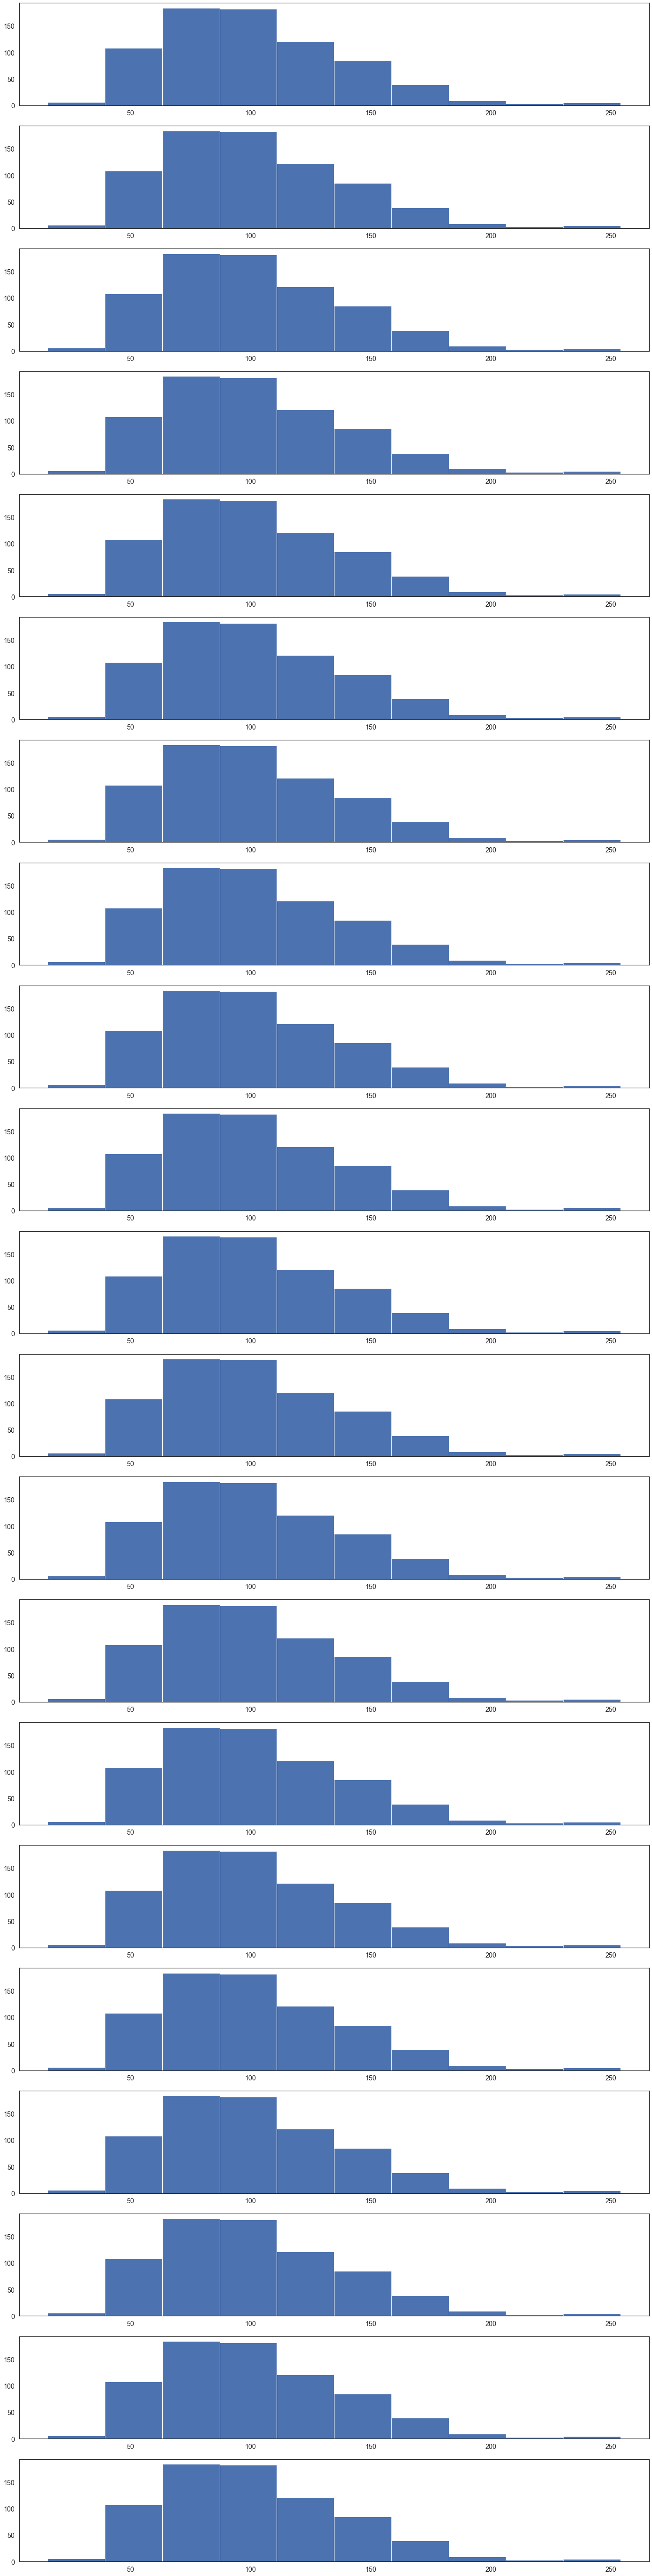

In [132]:
# check salary histogram of each company posted more than 5 postions
values=company['Company Name'].value_counts().index.tolist()
counts=company['Company Name'].value_counts().tolist()
fig,axe=plt.subplots(sum(np.array(counts)>5),figsize=(24,100))
for comp,count in zip(values,counts):
    if count>5:
        axe[values.index(comp)].hist(company['Avg_Salary_K'])
        
# Since it's not symetricly distributed, will use median to represent salary level of a company

In [148]:
company_reduced=company.drop_duplicates(subset=['Company Name'],ignore_index=True)
company_reduced.head()

,Company Name,Rating,Size,Revenue,Avg_Salary_K,Company Age
0,Tecolote Research\n3.8,3.8,501 - 1000,$50 to $100 million (USD),72.0,48
1,University of Maryland Medical System\n3.4,3.4,10000+,$2 to $5 billion (USD),87.5,37
2,KnowBe4\n4.8,4.8,501 - 1000,$100 to $500 million (USD),85.0,11
3,PNNL\n3.8,3.8,1001 - 5000,$500 million to $1 billion (USD),76.5,56
4,Affinity Solutions\n2.9,2.9,51 - 200,Unknown / Non-Applicable,114.5,23


In [149]:
median_salary=pd.DataFrame(company.groupby(company['Company Name']).Avg_Salary_K.median())
median_salary=median_salary.reset_index()
median_salary.columns=['Company Name','Median_Salary_K']
median_salary.head(10)

,Company Name,Median_Salary_K
0,"1-800-FLOWERS.COM, Inc.\n2.8",76.5
1,1904labs\n4.7,143.5
2,23andMe\n4.0,92.0
3,7Park Data\n3.8,121.0
4,<intent>\n4.6,140.0
5,ALIN,110.5
6,AVANADE\n3.9,87.0
7,AXION Healthcare Solutions\n3.6,66.0
8,Acceleron Pharma\n4.4,140.0
9,Accuride International\n3.6,107.5


In [150]:
new_comp=company_reduced.merge(median_salary, left_on='Company Name',right_on='Company Name')
new_comp.head(20)

,Company Name,Rating,Size,Revenue,Avg_Salary_K,Company Age,Median_Salary_K
0,Tecolote Research\n3.8,3.8,501 - 1000,$50 to $100 million (USD),72.0,48,72.00
1,University of Maryland Medical System\n3.4,3.4,10000+,$2 to $5 billion (USD),87.5,37,87.50
2,KnowBe4\n4.8,4.8,501 - 1000,$100 to $500 million (USD),85.0,11,73.00
3,PNNL\n3.8,3.8,1001 - 5000,$500 million to $1 billion (USD),76.5,56,78.50
4,Affinity Solutions\n2.9,2.9,51 - 200,Unknown / Non-Applicable,114.5,23,114.00
5,CyrusOne\n3.4,3.4,201 - 500,$1 to $2 billion (USD),95.0,21,95.00
6,ClearOne Advantage\n4.1,4.1,501 - 1000,Unknown / Non-Applicable,73.5,13,73.50
7,Logic20/20\n3.8,3.8,201 - 500,$25 to $50 million (USD),114.0,16,114.00
8,Rochester Regional Health\n3.3,3.3,10000+,$500 million to $1 billion (USD),61.0,7,84.50
9,<intent>\n4.6,4.6,51 - 200,$100 to $500 million (USD),140.0,12,140.00


## Visulisation_lower bound

#### Since Size and Revenue are not quantatative variables, I will have to convert them into quantatative.

#### The values will be lower bound of intervals.

In [151]:
new_comp.head()

,Company Name,Rating,Size,Revenue,Avg_Salary_K,Company Age,Median_Salary_K
0,Tecolote Research\n3.8,3.8,501 - 1000,$50 to $100 million (USD),72.0,48,72.0
1,University of Maryland Medical System\n3.4,3.4,10000+,$2 to $5 billion (USD),87.5,37,87.5
2,KnowBe4\n4.8,4.8,501 - 1000,$100 to $500 million (USD),85.0,11,73.0
3,PNNL\n3.8,3.8,1001 - 5000,$500 million to $1 billion (USD),76.5,56,78.5
4,Affinity Solutions\n2.9,2.9,51 - 200,Unknown / Non-Applicable,114.5,23,114.0


In [152]:
comp=new_comp

In [153]:
new_comp['Revenue'].unique()

array(['$50 to $100 million (USD)', '$2 to $5 billion (USD)',
       '$100 to $500 million (USD)', '$500 million to $1 billion (USD)',
       'Unknown / Non-Applicable', '$1 to $2 billion (USD)',
       '$25 to $50 million (USD)', '$10+ billion (USD)',
       '$1 to $5 million (USD)', '$10 to $25 million (USD)',
       '$5 to $10 billion (USD)', 'Less than $1 million (USD)',
       '$5 to $10 million (USD)'], dtype=object)

In [154]:
new_comp['Size'].unique()

array(['501 - 1000 ', '10000+ ', '1001 - 5000 ', '51 - 200 ',
       '201 - 500 ', '5001 - 10000 ', '1 - 50 ', 'unknown'], dtype=object)

In [155]:
comp.head()

,Company Name,Rating,Size,Revenue,Avg_Salary_K,Company Age,Median_Salary_K
0,Tecolote Research\n3.8,3.8,501 - 1000,$50 to $100 million (USD),72.0,48,72.0
1,University of Maryland Medical System\n3.4,3.4,10000+,$2 to $5 billion (USD),87.5,37,87.5
2,KnowBe4\n4.8,4.8,501 - 1000,$100 to $500 million (USD),85.0,11,73.0
3,PNNL\n3.8,3.8,1001 - 5000,$500 million to $1 billion (USD),76.5,56,78.5
4,Affinity Solutions\n2.9,2.9,51 - 200,Unknown / Non-Applicable,114.5,23,114.0


In [159]:
df_rev=pd.DataFrame()
replace_rev=pd.Series([])
for i,j in zip(new_comp['Revenue'].unique(),[50,2000,100,500,np.nan,1000,25,10000,1,10,5000,0.1,5]):
    replace_rev=replace_rev.append(comp.loc[comp['Revenue']==i]['Revenue'].replace([i],j))
    df_rev=pd.concat([df_rev,comp.loc[comp['Revenue']==i]])

C:\Users\Chang Sun\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [160]:
size_quant=comp["Size"].replace({'501 - 1000 ': 501, 
                                     '10000+ ': 10000,
                                    '1001 - 5000 ':1001,
                                    '51 - 200 ':51,
                                    '201 - 500 ':201,
                                    '5001 - 10000 ':5001,
                                     '1 - 50 ':1,
                                    'unknown':np.nan})
comp['size_quant']=size_quant

In [161]:
comp['revenue_quant']=replace_rev
comp['revenue_quant']

0        50.0
1      2000.0
2       100.0
3       500.0
4         NaN
        ...  
338      25.0
339       NaN
340       5.0
341       NaN
342     100.0
Name: revenue_quant, Length: 343, dtype: float64

In [162]:
len(comp)

343

In [163]:
sum(comp.isnull().values.ravel())

115

In [164]:
comp.drop(['Size','Revenue','Avg_Salary_K'],axis=1,inplace=True)
comp.head()

,Company Name,Rating,Company Age,Median_Salary_K,size_quant,revenue_quant
0,Tecolote Research\n3.8,3.8,48,72.0,501.0,50.0
1,University of Maryland Medical System\n3.4,3.4,37,87.5,10000.0,2000.0
2,KnowBe4\n4.8,4.8,11,73.0,501.0,100.0
3,PNNL\n3.8,3.8,56,78.5,1001.0,500.0
4,Affinity Solutions\n2.9,2.9,23,114.0,51.0,NaN


In [165]:
sum(comp.isnull().values.ravel())

115

In [166]:
comp.dropna(inplace=True)
len(comp)

232

In [167]:
comp_name=comp['Company Name']

In [168]:
comp.drop(['Company Name'],axis=1,inplace=True)

In [169]:
comp.head()

,Rating,Company Age,Median_Salary_K,size_quant,revenue_quant
0,3.8,48,72.0,501.0,50.0
1,3.4,37,87.5,10000.0,2000.0
2,4.8,11,73.0,501.0,100.0
3,3.8,56,78.5,1001.0,500.0
5,3.4,21,95.0,201.0,1000.0


In [170]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaled_x=StandardScaler().fit_transform(comp)
pca=PCA(n_components=3).fit(scaled_x)
reduced=pca.transform(scaled_x)
pca.explained_variance_ratio_

array([0.43135348, 0.20546304, 0.19539131])

In [171]:
import plotly.express as px
fig = px.scatter_3d(reduced, x=reduced[:,0], y=reduced[:,1], z=reduced[:,2],labels=dict(x="PC1", y="PC2",z='PC3'))
fig.show()

## Clustering

In [30]:
import numpy as np
import scipy as sp
import scipy.spatial.distance as spd
import scipy.cluster.hierarchy as sph
import sklearn as sk
import sklearn.cluster as skc
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
sns.set(style='white', color_codes=True, font_scale=1.3)

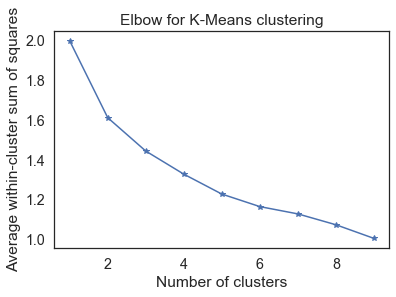

In [172]:
from sklearn.cluster import KMeans
K = range(1,10)  # Apply kmeans 1 to 10
kmeans_models = [KMeans(k).fit(scaled_x) for k in K]
centroids = [m.cluster_centers_ for m in kmeans_models]
D_k = [spd.cdist(scaled_x, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/scaled_x.shape[0] for d in dist]

# plot elbow curve
plt.plot(K, avgWithinSS, 'b*-')
plt.xlabel('Number of clusters');
plt.ylabel('Average within-cluster sum of squares');
plt.title('Elbow for K-Means clustering');
# There is no obvious elbow

In [173]:
# Will use silhouette as metrics to find the best number of clusters
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

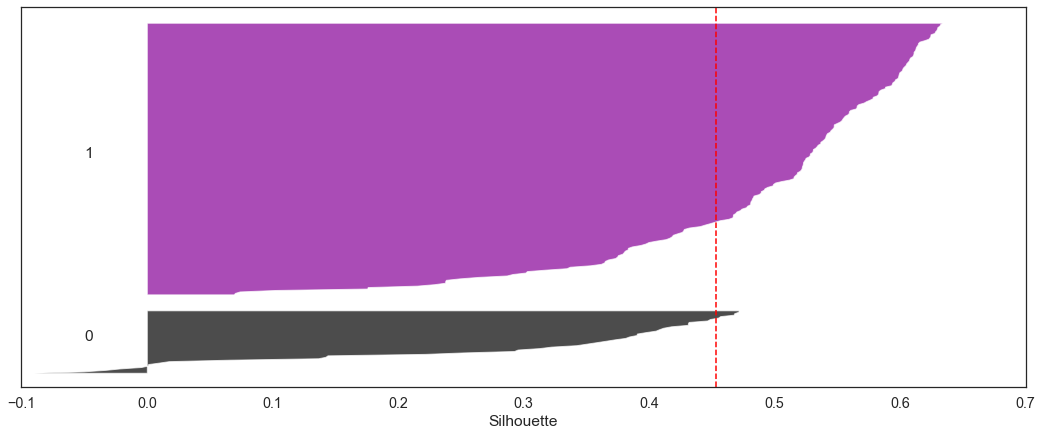

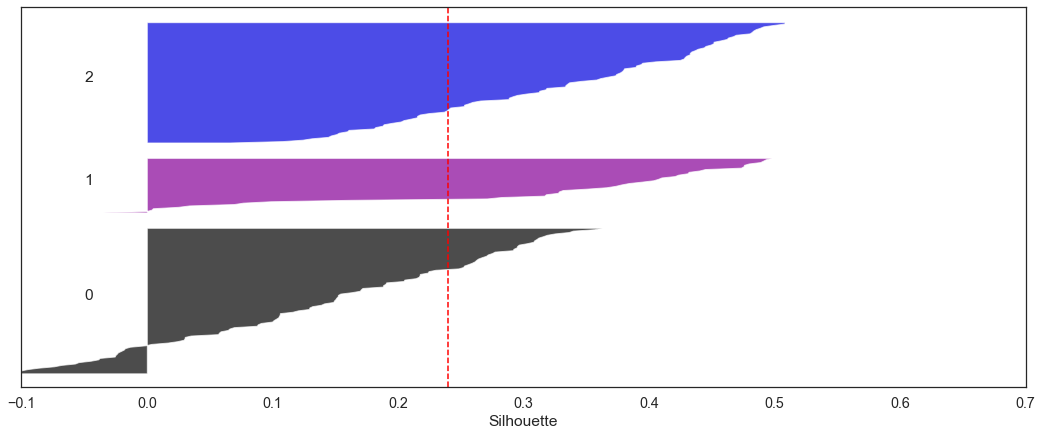

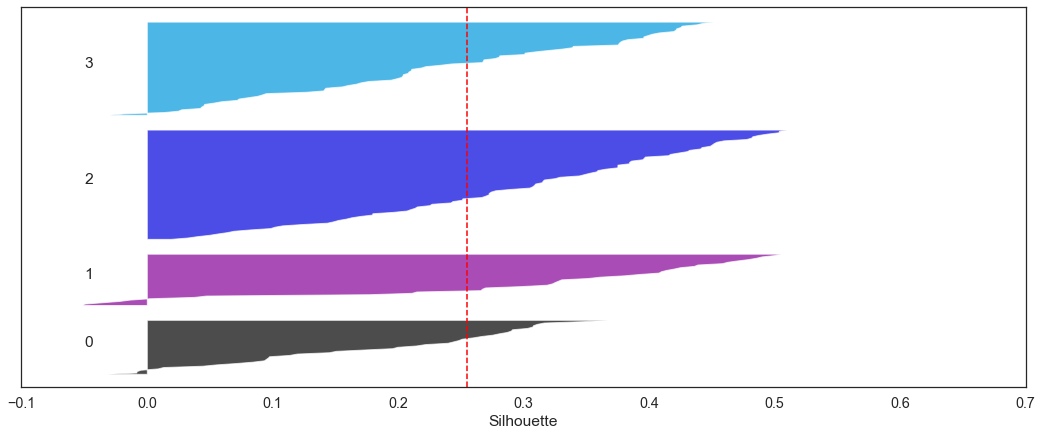

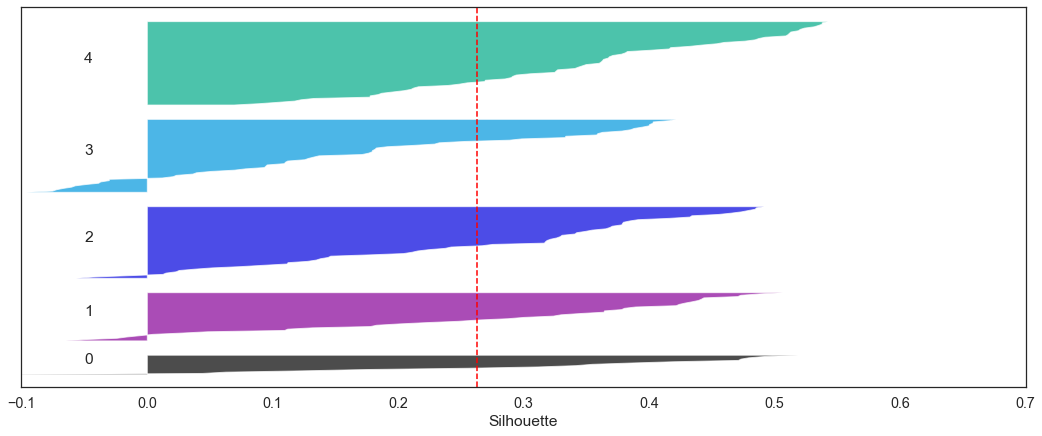

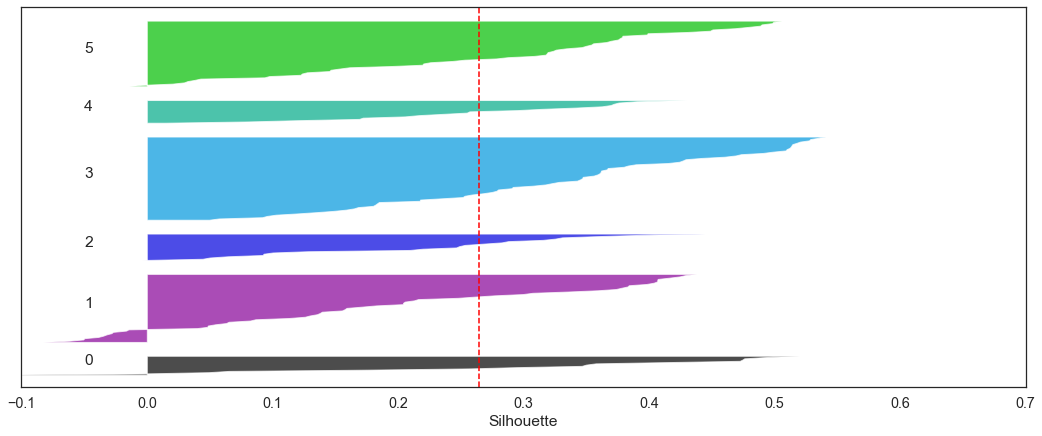

In [174]:
si=[]
for n_clusters in range(2,7):

    clusterer = KMeans(n_clusters=n_clusters,random_state=2020).fit(scaled_x)
    y_pred=clusterer.labels_

    si_ave=silhouette_score(scaled_x, y_pred)
    si_sample=silhouette_samples(scaled_x,y_pred)
    si.append(si_ave)

    fig,ax=plt.subplots(1,1)
    fig.set_size_inches(18,7)
    ax.set_xlim(-0.5,1)
    ax.set_ylim(0, scaled_x.shape[0]+(n_clusters+1)*10)

    y_lower=10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = si_sample[y_pred==i]
        ith_cluster_silhouette_values.sort()
        size=ith_cluster_silhouette_values.shape[0]
        y_upper=y_lower+size
        color=cm.nipy_spectral(i/10)
        ax.fill_betweenx(np.arange(y_lower,y_upper),ith_cluster_silhouette_values,facecolor=color,alpha=0.7)
        ax.text(-0.05, y_lower+0.5*size, str(i))
        y_lower=y_upper+10

    fig = px.scatter_3d(reduced, x=reduced[:,0], y=reduced[:,1], z=reduced[:,2],color=clusterer.labels_
                       ,labels=dict(x="PC1", y="PC2",z='PC3'))
    fig.show()

    ax.axvline(x=si_ave,color='red',linestyle='--')
    ax.set_yticks([])
    ax.set_xlabel('Silhouette')
    ax.set_xlim([-0.1,0.7])


In [175]:
si
#  Silhouette is higher when K=2,2 clusters are the best

[0.45313999744863076,
 0.2402238059172163,
 0.25506784480087175,
 0.2630684138343946,
 0.26435951097266847]

In [176]:
kmeans_model = KMeans(n_clusters=2,random_state=2022).fit(scaled_x)
centroids = kmeans_model.cluster_centers_
centroids  # these are the centers of the clusters

array([[ 0.04884674, -0.2307472 , -0.06424155, -0.4225165 , -0.41138057],
       [-0.20870882,  0.98591987,  0.2744866 ,  1.80529777,  1.75771697]])

In [177]:
kmeans_model.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [178]:
reduced_df=pd.DataFrame(reduced)
df_plot=pd.concat([reduced_df,pd.Series(kmeans_model.labels_)],axis=1)
df_plot.columns=['PC1','PC2','PC3','Label']
df_plot

,PC1,PC2,PC3,Label
0,-0.755400,-0.659684,0.253825,0
1,1.297796,0.040693,0.405062,1
2,-1.258747,-1.033911,-1.105379,0
3,-0.477398,-0.580650,0.160385,0
4,-0.698244,0.372770,0.411341,0
...,...,...,...,...
227,-0.885298,0.380999,0.406325,0
228,-0.867849,-1.102777,-0.353159,0
229,-0.971657,0.311929,-0.217299,0
230,-1.151753,0.421012,0.483014,0


In [179]:
import plotly.express as px
df_plot['cluster']=df_plot['Label'].map({0:'cluster1',1:'cluster2'})
color_discrete_map = {'cluster1': 'red',  'cluster2': 'blue'}
fig = px.scatter_3d(reduced, x=reduced[:,0], y=reduced[:,1], z=reduced[:,2],
                    color=df_plot['cluster'],labels=dict(x="PC1",y="PC2",z='PC3'),
                   color_discrete_map = color_discrete_map)

fig.show()

In [40]:
df_plot[df_plot['PC2']>6.5]

,PC1,PC2,PC3,Label,cluster
100,0.263242,6.57246,4.294449,1,cluster2


In [41]:
comp.iloc[100,]

Rating              -1.0
Company Age          4.0
Median_Salary_K    225.0
size_quant          51.0
revenue_quant        5.0
Name: 144, dtype: float64

In [42]:
comp_name[100]

'Autodesk\n4.0'

In [181]:
# Visulization with origal 5 dimensions projected into 3D space
from plotly.offline import plot
import plotly.graph_objs as go
df_plot['color']=df_plot['Label'].map({0:'red',1:'blue'})
trace1 = go.Scatter3d(
    x=reduced[:,0],
    y = reduced[:,1],
    z = reduced[:,2],
#     text=comp_name,
    mode='markers',
    marker=dict(
        size=6,
         color=df_plot['color'],
))

dc_1 = go.Scatter3d( x = [0,4*pca.components_.T[0][0]],
                     y = [0,4*pca.components_.T[0][1]],
                     z = [0,4*pca.components_.T[0][2]],
                     marker = dict( size = 1,
                                    color = "rgb(84,48,5)"),
                     line = dict( color = "red",
                                width = 6),
                     name = "Rating",
                  )

dc_2 = go.Scatter3d( x = [0,4*pca.components_.T[1][0]],
                   y = [0,4*pca.components_.T[1][1]],
                   z = [0,4*pca.components_.T[1][2]],
                   marker = dict( size = 1,
                                  color = "rgb(84,48,5)"),
                   line = dict( color = "green",
                                width = 6),
                   name = "Company Age_Scaled"
                 )
dc_3 = go.Scatter3d( x = [0,4*pca.components_.T[2][0]],
                     y = [0,4*pca.components_.T[2][1]],
                     z = [0,4*pca.components_.T[2][2]],
                     marker = dict( size = 1,
                                  color = "rgb(84,48,5)"),
                     line = dict( color = "blue",
                                width = 6),
                     name = "Median_Salary_K_Scaled"
                 ) 
dc_4 = go.Scatter3d( x = [0,4*pca.components_.T[3][0]],
                     y = [0,4*pca.components_.T[3][1]],
                     z = [0,4*pca.components_.T[3][2]],
                     marker = dict( size = 1,
                                  color = "rgb(84,48,5)"),
                     line = dict( color = "orange",
                                width = 6),
                     name = "Size_Scaled"
                   )
dc_5 = go.Scatter3d( x = [0,4*pca.components_.T[4][0]],
                     y = [0,4*pca.components_.T[4][1]],
                     z = [0,4*pca.components_.T[4][2]],
                     marker = dict( size = 1,
                                  color = "rgb(51,0,0)"),
                     line = dict( color = "black",
                                width = 6),
                     name = "Revenue_Scaled"
                   )


data = [trace1,dc_1,dc_2,dc_3,dc_4,dc_5]
fig = go.Figure(data=data,)
fig.update_layout(
    scene=dict(
          xaxis_title='PC1',
          yaxis_title='PC2',
          zaxis_title='PC3',
        ))
fig.show()


In [182]:
# To view in 2D plots
import plotly.express as px
fig = px.scatter(scaled_x, x=scaled_x[:,0], y=scaled_x[:,1],color=df_plot['cluster'],
                 color_discrete_map = {'cluster1': 'red',  'cluster2': 'blue'},
                 labels=dict(x="Scaled Rating", y="Scaled Company Age", color="Cluster"))
fig.show()

In [183]:
fig = px.scatter(scaled_x, x=scaled_x[:,0], y=scaled_x[:,2],color=df_plot['cluster'],#text=comp_name,
                 color_discrete_map = {'cluster1': 'red',  'cluster2': 'blue'},labels=dict(x="Scaled Rating", y="Scaled Median Salary", color="Cluster"))
fig.show()

In [184]:
fig = px.scatter(scaled_x, x=scaled_x[:,0], y=scaled_x[:,3],color=df_plot['cluster'],#text=comp_name,
                 color_discrete_map = {'cluster1': 'red',  'cluster2': 'blue'},
                 labels=dict(x="Scaled Rating", y="Scaled Size",))
fig.update_traces(textposition='top center')
fig.show()

#### Blue Companies: Greater scaled, well established

#### Red Companies: smaller scaled, newly emerging

#### No difference in median salary between two types of companies

In [185]:
fig = px.scatter(scaled_x, x=scaled_x[:,0], y=scaled_x[:,4],color=df_plot['cluster'],
                 color_discrete_map = {'cluster1': 'red',  'cluster2': 'blue'},
                 labels=dict(x="Scaled Rating", y="Scaled Revenue", color="Cluster"))
fig.show()

## Prepare data for skill radar plots

In [186]:
comp.columns

Index(['Rating', 'Company Age', 'Median_Salary_K', 'size_quant',
       'revenue_quant'],
      dtype='object')

In [187]:
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na


In [188]:
skill=df.groupby(['Sector'])['Python',
        'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
        'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an'].sum()
skill=skill.reset_index()
skill=skill[skill['Sector'].isin( ['Information Technology','Biotech & Pharmaceuticals'
                                ,'Business Services','Insurance','Health Care','Finance'])]
skill

C:\Users\Chang Sun\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Sector,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
5,Biotech & Pharmaceuticals,38,10,22,65,18,5,3,7,7,7,6,6,2,0,4,0
6,Business Services,63,34,42,56,72,8,1,4,3,7,28,29,8,1,9,2
10,Finance,24,5,6,31,32,9,4,0,2,4,5,14,5,0,2,0
12,Health Care,10,6,11,12,17,1,0,0,0,0,7,9,2,0,0,0
13,Information Technology,122,72,56,83,109,10,12,7,22,24,46,39,15,7,7,0
14,Insurance,39,17,12,41,44,17,3,6,7,6,12,12,5,0,1,0


In [189]:
skill_value=skill.drop('Sector',axis=1)
skill_normalized=skill_value.div(skill.sum(axis=1), axis=0)
skill_nomalized=skill_normalized.T
skill_nomalized.columns= ['Information Technology','Biotech & Pharmaceuticals'
                                ,'Business Services','Insurance','Health Care','Finance']
skill_nomalized

,Information Technology,Biotech & Pharmaceuticals,Business Services,Insurance,Health Care,Finance
Python,0.190,0.171662,0.167832,0.133333,0.193344,0.175676
spark,0.050,0.092643,0.034965,0.080000,0.114105,0.076577
aws,0.110,0.114441,0.041958,0.146667,0.088748,0.054054
excel,0.325,0.152589,0.216783,0.160000,0.131537,0.184685
sql,0.090,0.196185,0.223776,0.226667,0.172742,0.198198
sas,0.025,0.021798,0.062937,0.013333,0.015848,0.076577
keras,0.015,0.002725,0.027972,0.000000,0.019017,0.013514
pytorch,0.035,0.010899,0.000000,0.000000,0.011094,0.027027
scikit,0.035,0.008174,0.013986,0.000000,0.034865,0.031532
tensor,0.035,0.019074,0.027972,0.000000,0.038035,0.027027


In [190]:
skill_nomalized.reset_index(inplace=True)

In [191]:
skill_nomalized

,index,Information Technology,Biotech & Pharmaceuticals,Business Services,Insurance,Health Care,Finance
0,Python,0.190,0.171662,0.167832,0.133333,0.193344,0.175676
1,spark,0.050,0.092643,0.034965,0.080000,0.114105,0.076577
2,aws,0.110,0.114441,0.041958,0.146667,0.088748,0.054054
3,excel,0.325,0.152589,0.216783,0.160000,0.131537,0.184685
4,sql,0.090,0.196185,0.223776,0.226667,0.172742,0.198198
5,sas,0.025,0.021798,0.062937,0.013333,0.015848,0.076577
6,keras,0.015,0.002725,0.027972,0.000000,0.019017,0.013514
7,pytorch,0.035,0.010899,0.000000,0.000000,0.011094,0.027027
8,scikit,0.035,0.008174,0.013986,0.000000,0.034865,0.031532
9,tensor,0.035,0.019074,0.027972,0.000000,0.038035,0.027027


## Plot Radar Plots

In [192]:
for i in skill_nomalized.columns[1:]:
    
    fig = px.line_polar(skill_nomalized[['index',i]], r=i, theta='index', line_close=True)
    fig.update_traces(fill='toself')
    fig.update_layout(title={
        'text': i,
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
         
        font=dict(
            family="Courier New, monospace",
            size=18,
            color="RebeccaPurple"
    ))
    fig.show()